In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [3]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'monospace'

In [4]:
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['savefig.pad_inches'] = 0.5

In [5]:
# Get the MNIST data
df = pd.read_csv('../data/mnist_train.csv', header=0, low_memory=False)

In [6]:
df.head()

,num,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#df['num'] = df['num'].astype('category')

In [8]:
# Calculate Intensity Features
df['intensity'] = df.ix[:,1:785].mean(axis = 1)/255
df.head()

,num,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x776,x777,x778,x779,x780,x781,x782,x783,x784,intensity
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.108398
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.164601
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.151251
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.135649
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.086405


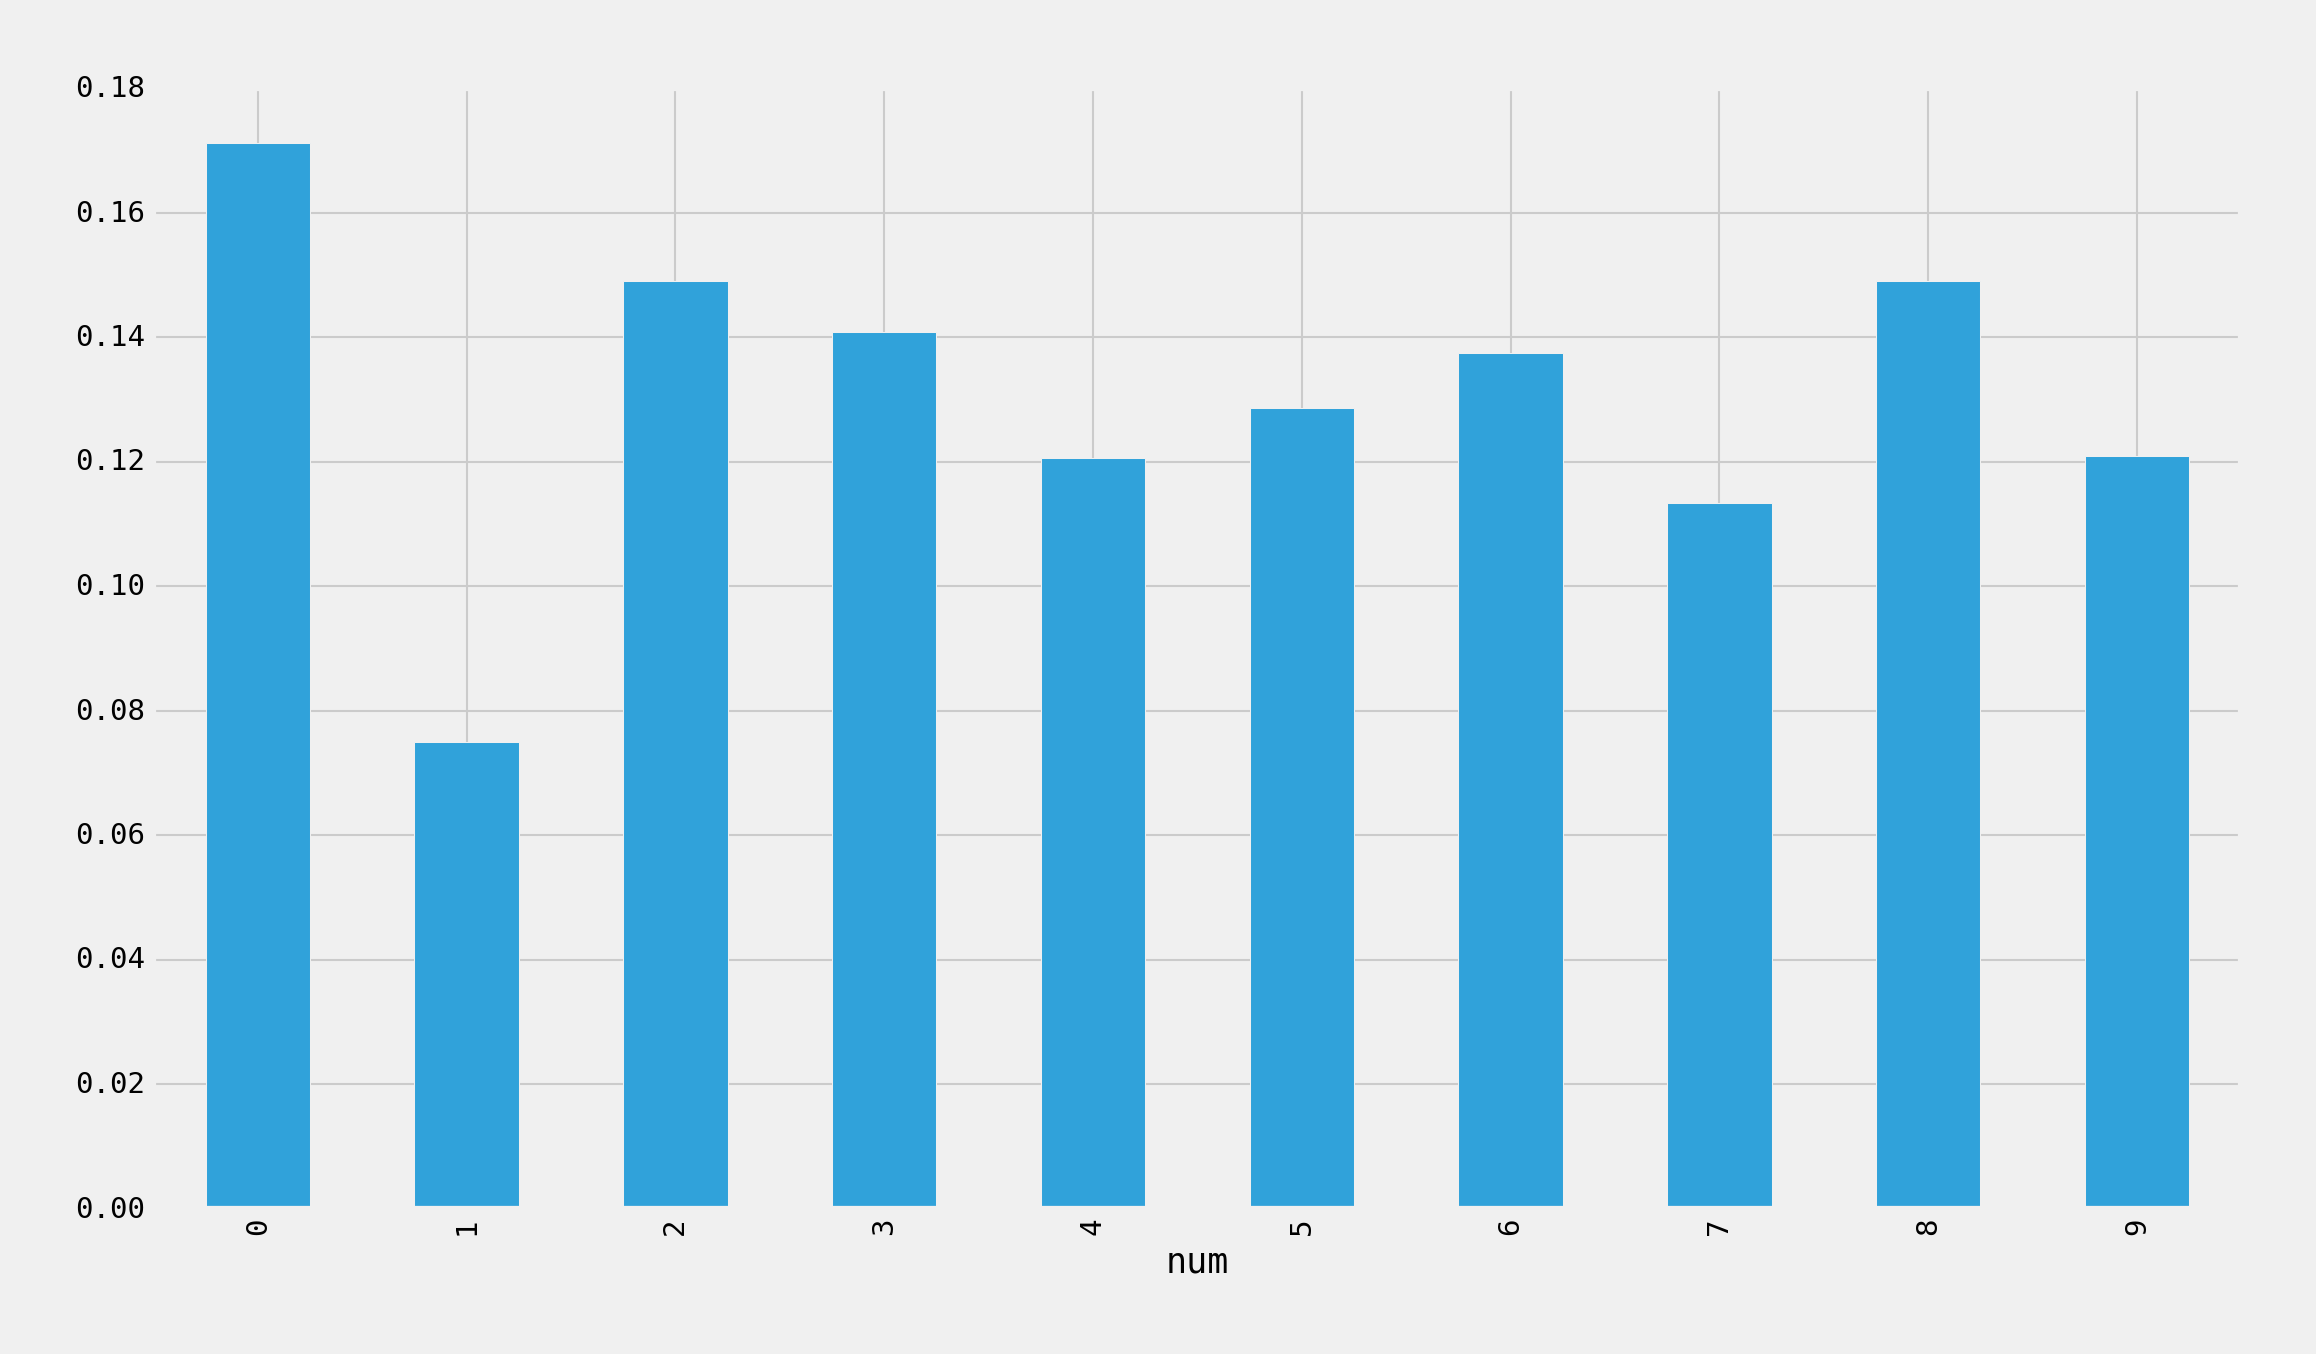

In [9]:
intensity_avg = df.groupby('num')['intensity'].mean()
intensity_avg.head()
intensity_avg.plot(kind = 'bar')

In [10]:
# Calculate Symmetry Features
def symmetry(arr1D):
    pixels = np.array(arr1D, dtype = 'uint8')
    pixels = pixels.reshape(28,28)
    # Flip Left to Right
    pixelslr = np.fliplr(pixels)
    # Flip Up to Down
    pixelsud = np.flipud(pixels)
    sym_matrix = (np.abs(pixels - pixelslr) + np.abs(pixels - pixelsud))/2
    sym = np.mean(sym_matrix) / 255
    return sym

In [11]:
df['symmetry'] = df.ix[:,1:785].apply(symmetry, axis = 1)
df.head()

,num,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x777,x778,x779,x780,x781,x782,x783,x784,intensity,symmetry
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.108398,0.075550
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.164601,0.090276
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.151251,0.085154
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.135649,0.081953
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.086405,0.079392


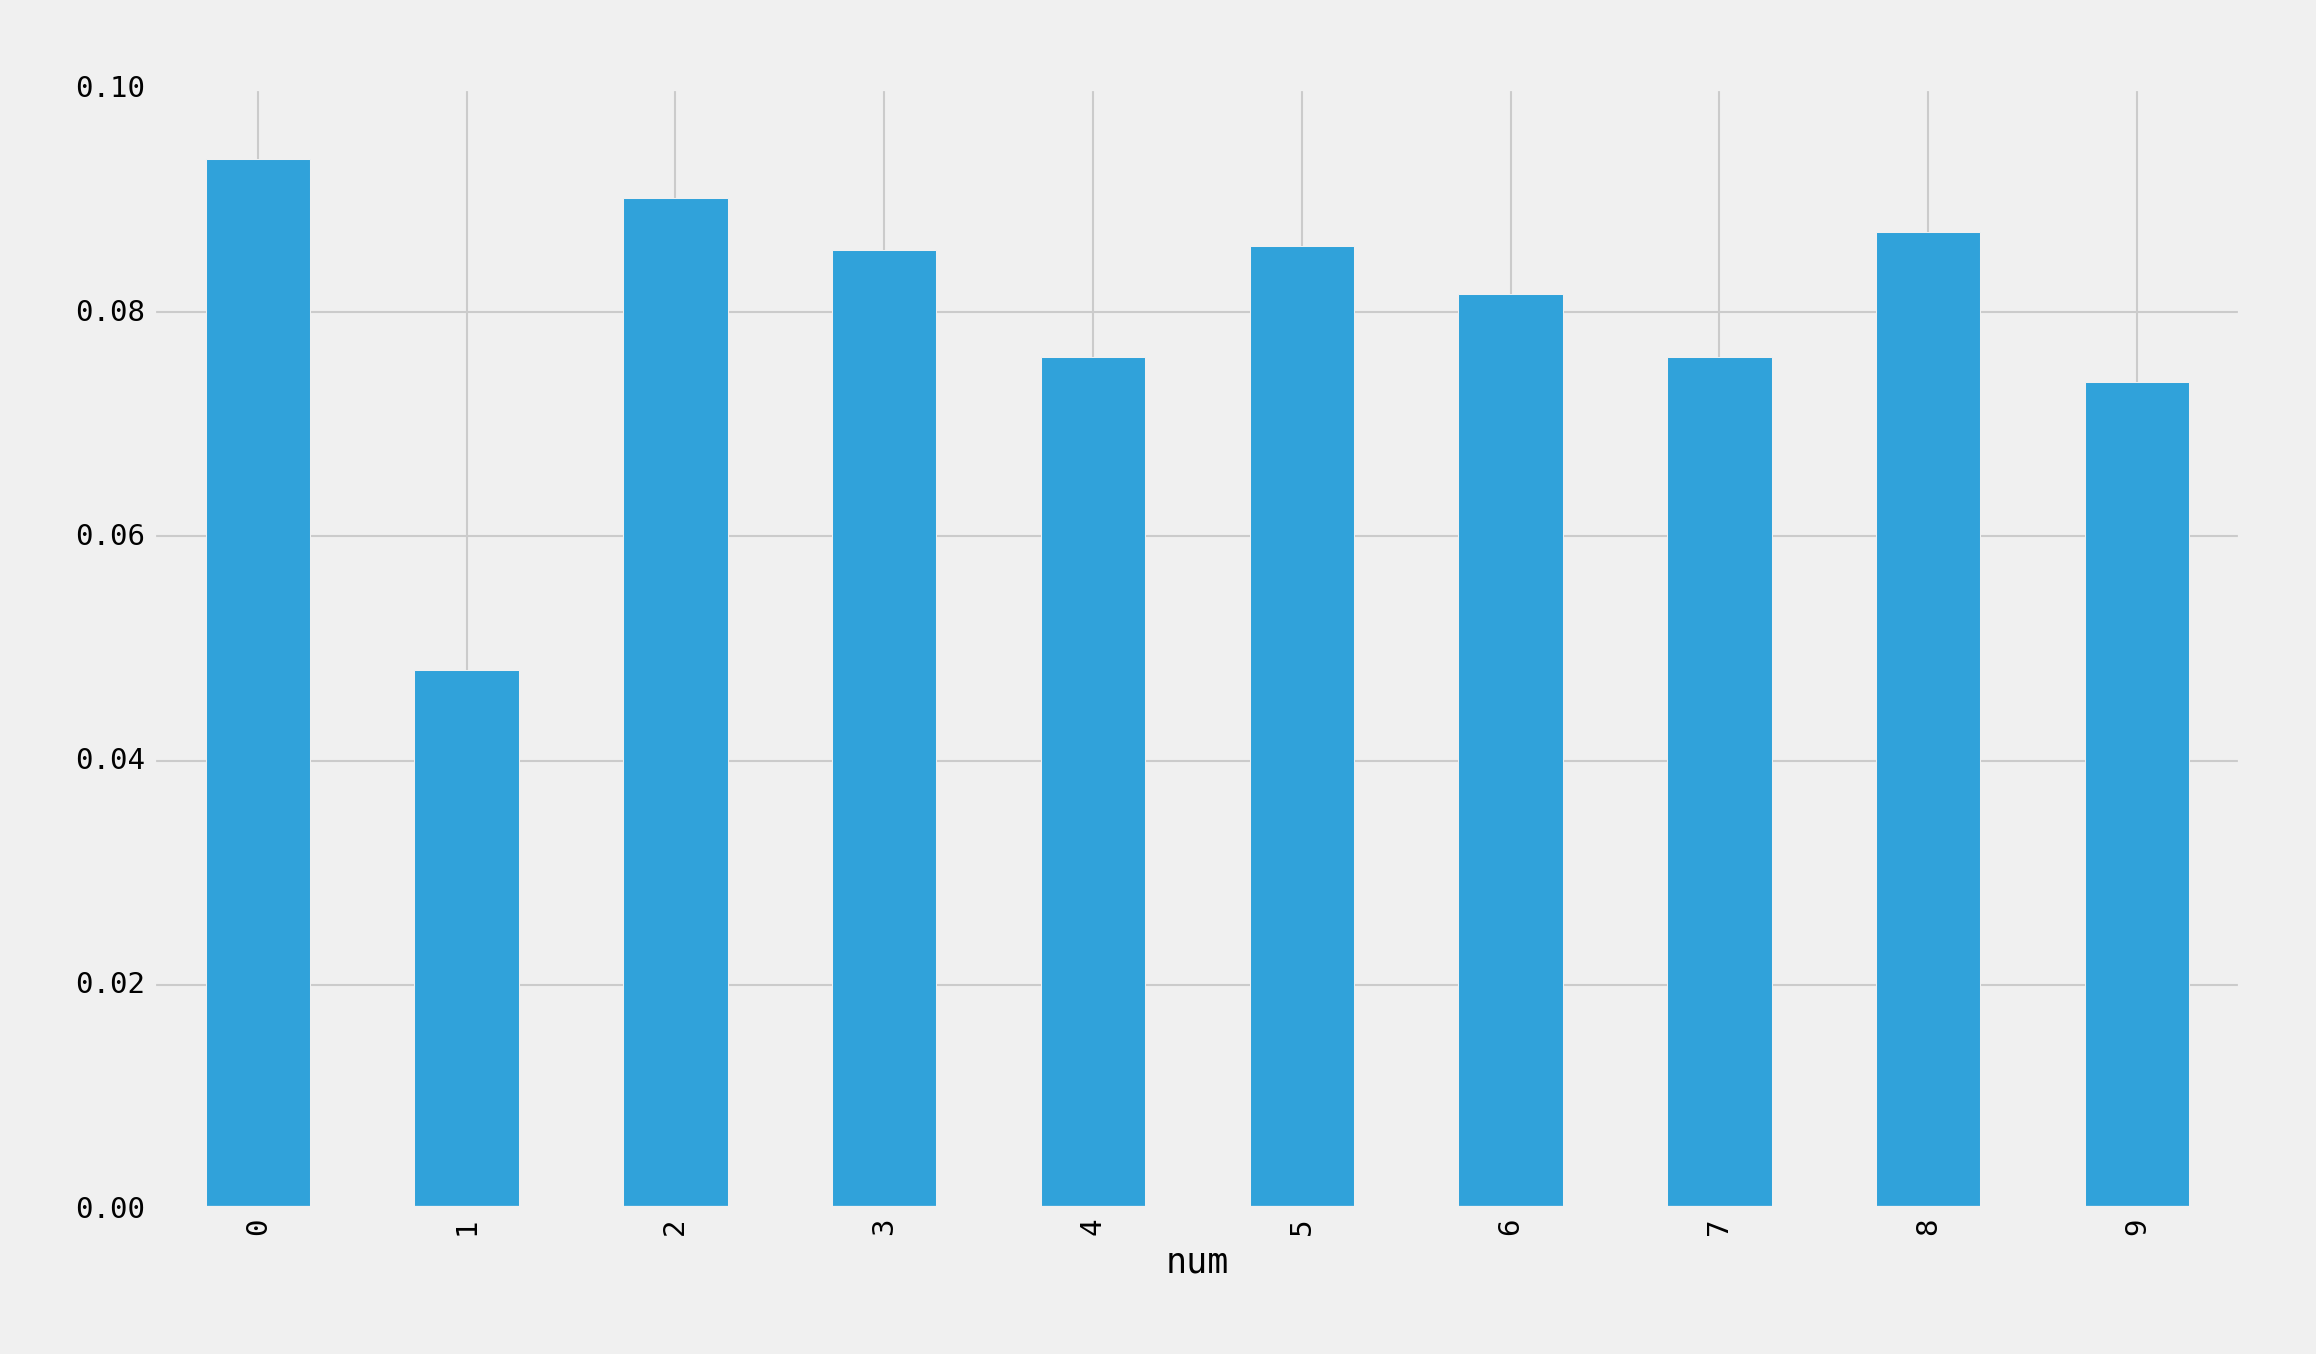

In [12]:
symmetry_avg = df.groupby('num')['symmetry'].mean()
symmetry_avg.head()
symmetry_avg.plot(kind = 'bar')

In [13]:
df1 = df[df.num == 1]
df2 = df[df.num == 2]

In [14]:
df1.head()

,num,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x777,x778,x779,x780,x781,x782,x783,x784,intensity,symmetry
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.075895,0.059544
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.089421,0.056343
22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.055102,0.043537
26,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.074460,0.037135
33,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.080202,0.055702


In [15]:
df2.head()

,num,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x777,x778,x779,x780,x781,x782,x783,x784,intensity,symmetry
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.164601,0.090276
23,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.133839,0.094758
50,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.127561,0.075550
60,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.123419,0.085794
62,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.127311,0.087715


In [16]:
# Plot a particular MNIST data
def plotDigit(arr1D, label):
    #arr1D = df.ix[id, 1:785]
    #label = df.ix[id, 0]
    pixels = np.array(arr1D, dtype='uint8')
    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28, 28))
    # Plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(pixels, cmap='gray')
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.xticks(np.arange(0, 28, 1))
    plt.yticks(np.arange(0, 28, 1))
    #plt.title('Label is {label}'.format(label=label))
    plt.grid(which='major', color=(0.25,0.25,0.25))

In [17]:
plt.rcParams['figure.figsize'] = (9, 9)

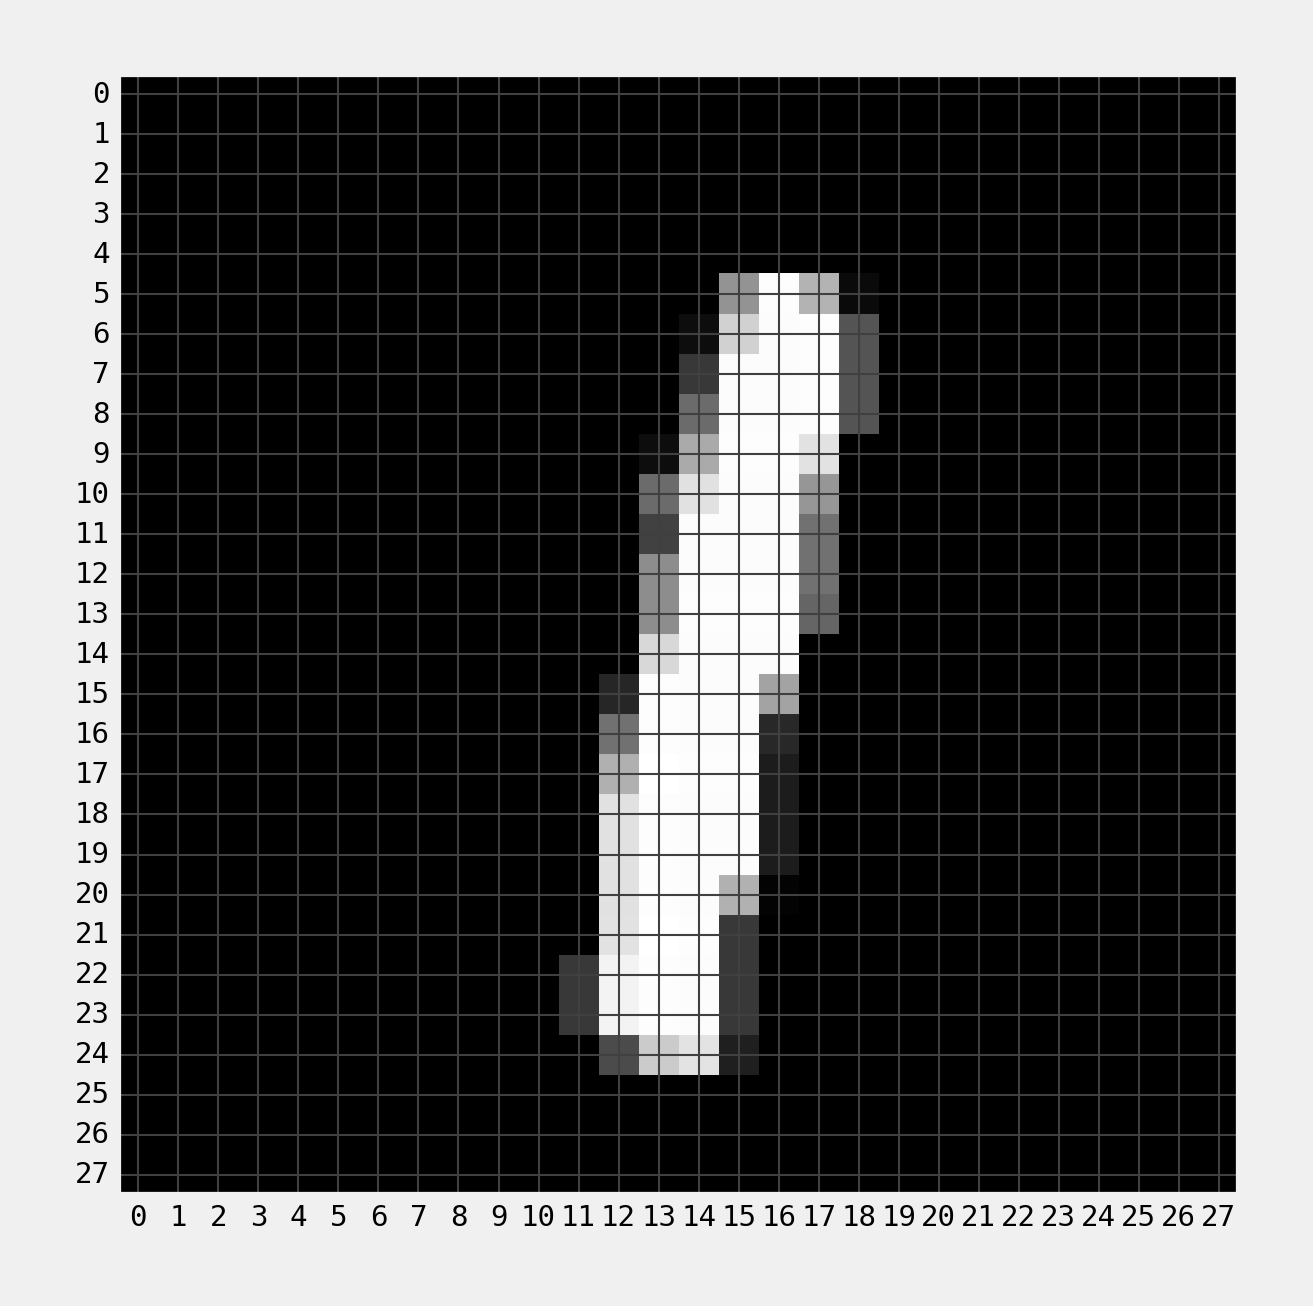

In [18]:
plotDigit(df.ix[10, 1:785], df.ix[10, 0])
plt.savefig("../presentations/strata-us/figures/fig_mnist_00a.png", facecolor = "white")

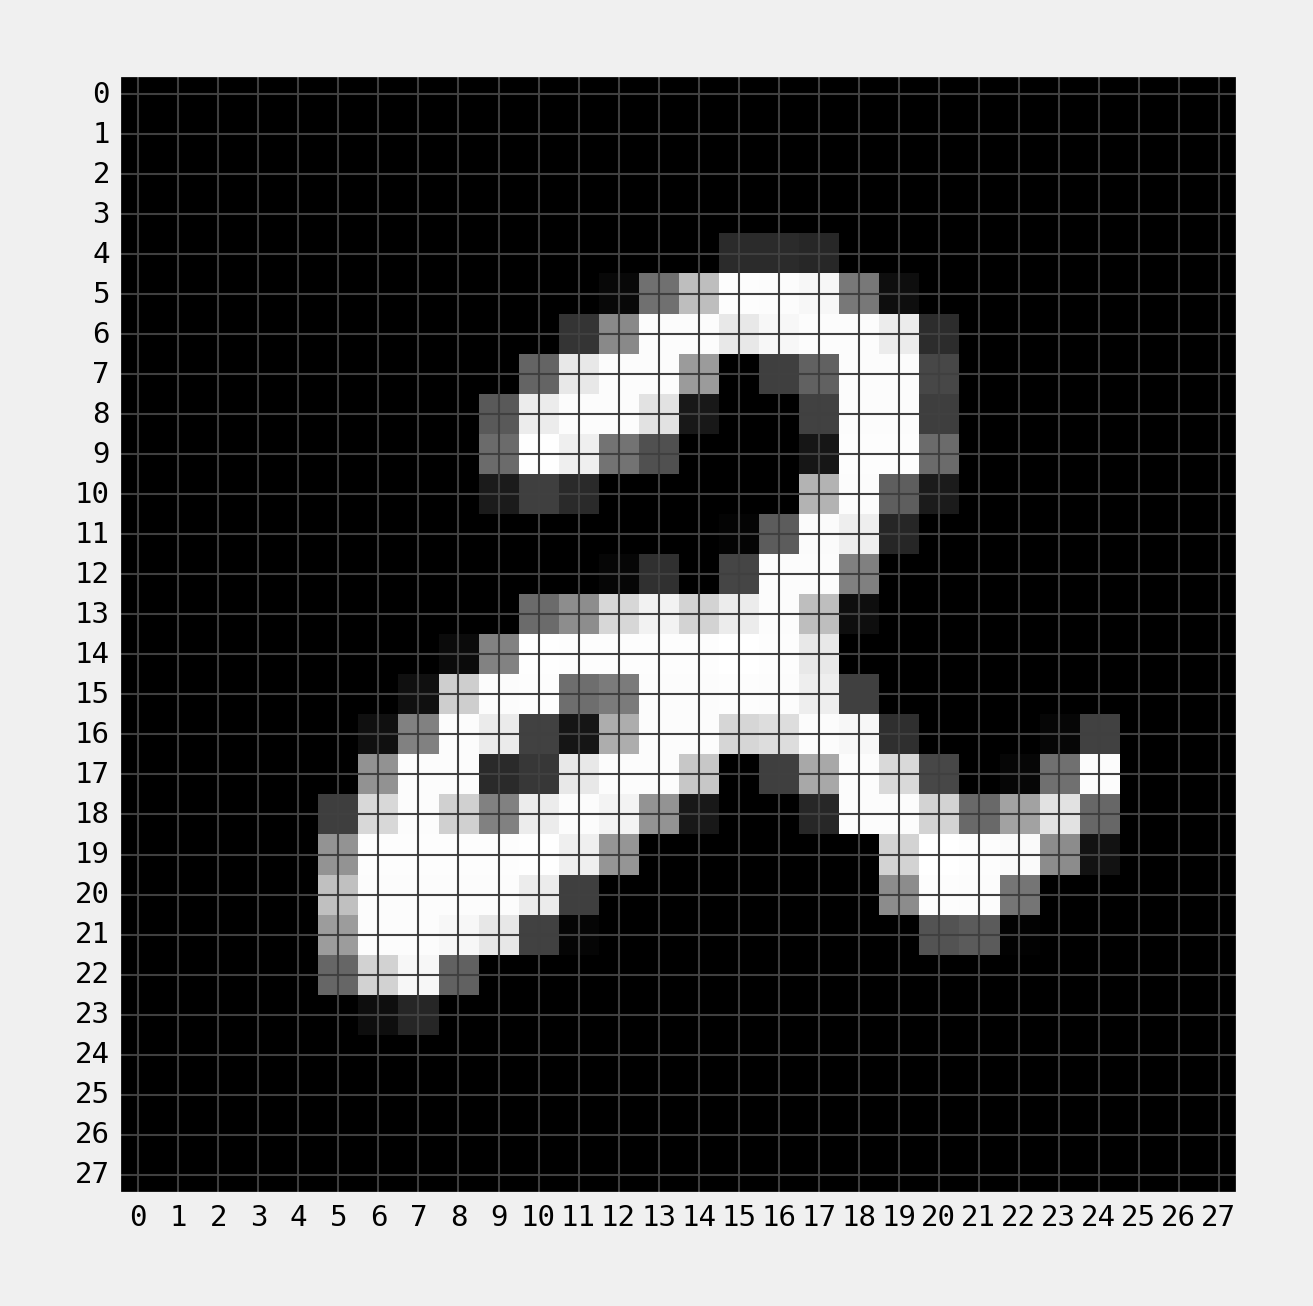

In [19]:
plotDigit(df.ix[63, 1:785], df.ix[63, 0])
plt.savefig("../presentations/strata-us/figures/fig_mnist_00b.png", facecolor = "white")

## [0] Visualise the Data Space

In [20]:
df1.shape

(2727, 787)

In [21]:
df2.shape

(2507, 787)

In [22]:
df1Avg = df1.ix[:,:].mean(axis = 0)
df2Avg = df2.ix[:,:].mean(axis = 0)

In [23]:
df1Avg[0]

1.0

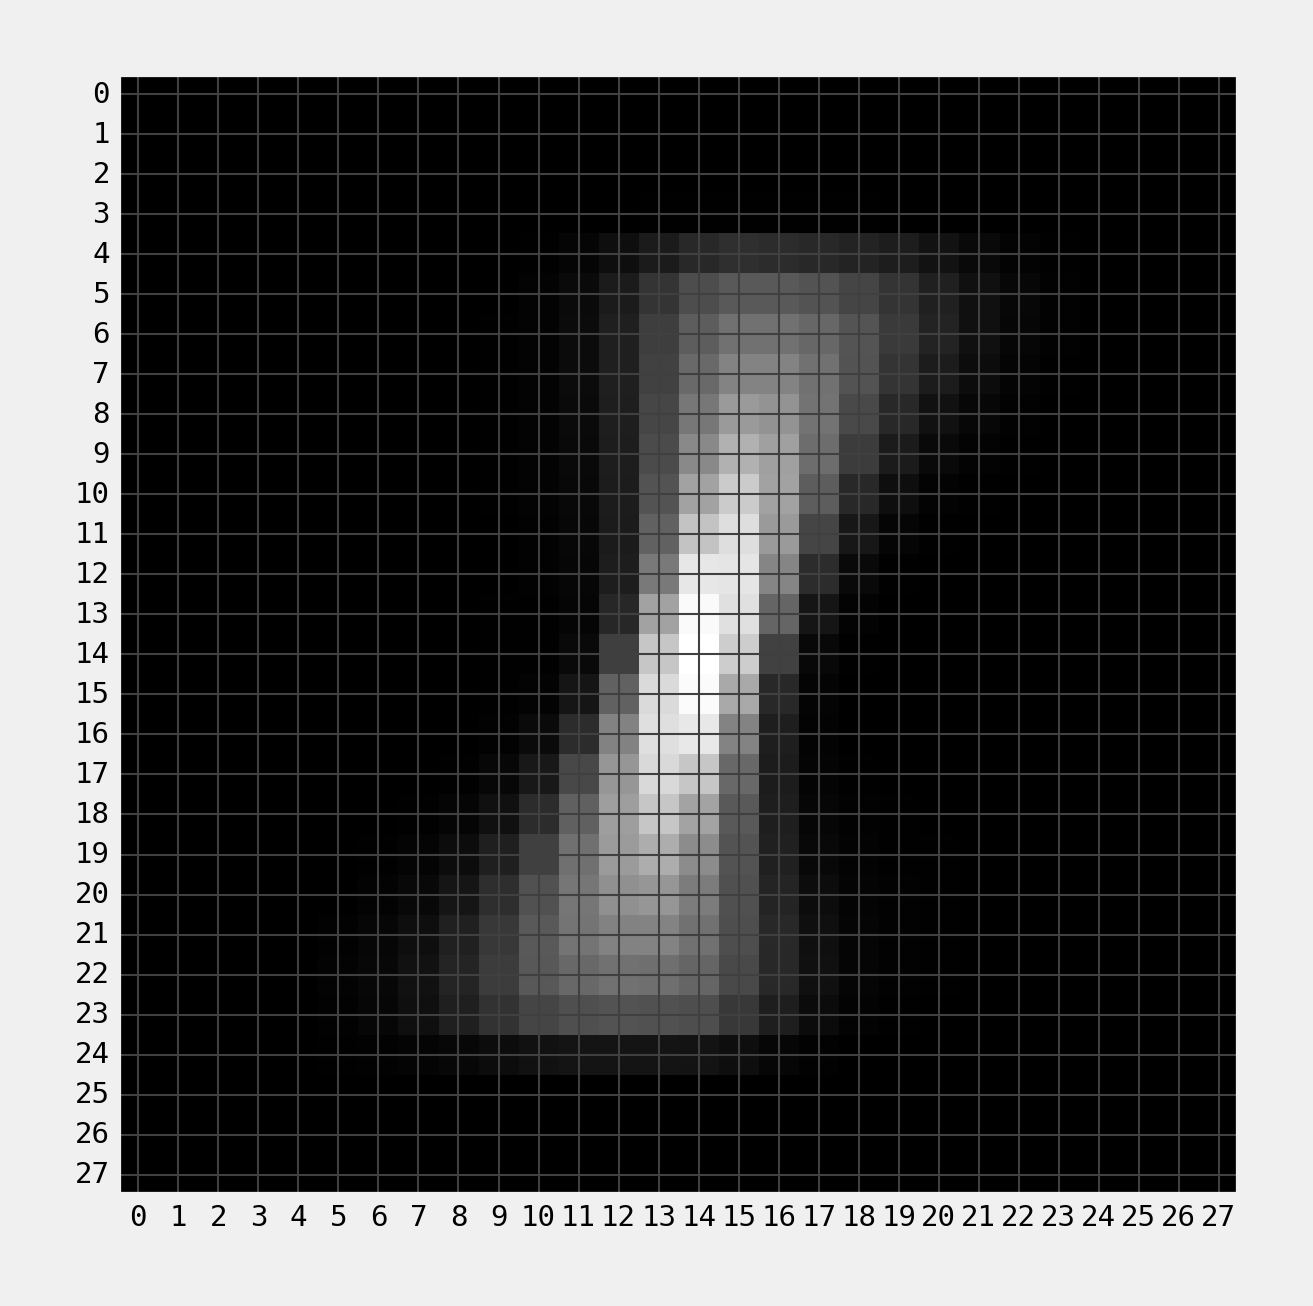

In [24]:
plotDigit(df1Avg[1:785], df1Avg[0])
plt.savefig("../presentations/strata-us/figures/fig_mnist_00c.png", facecolor = "white")

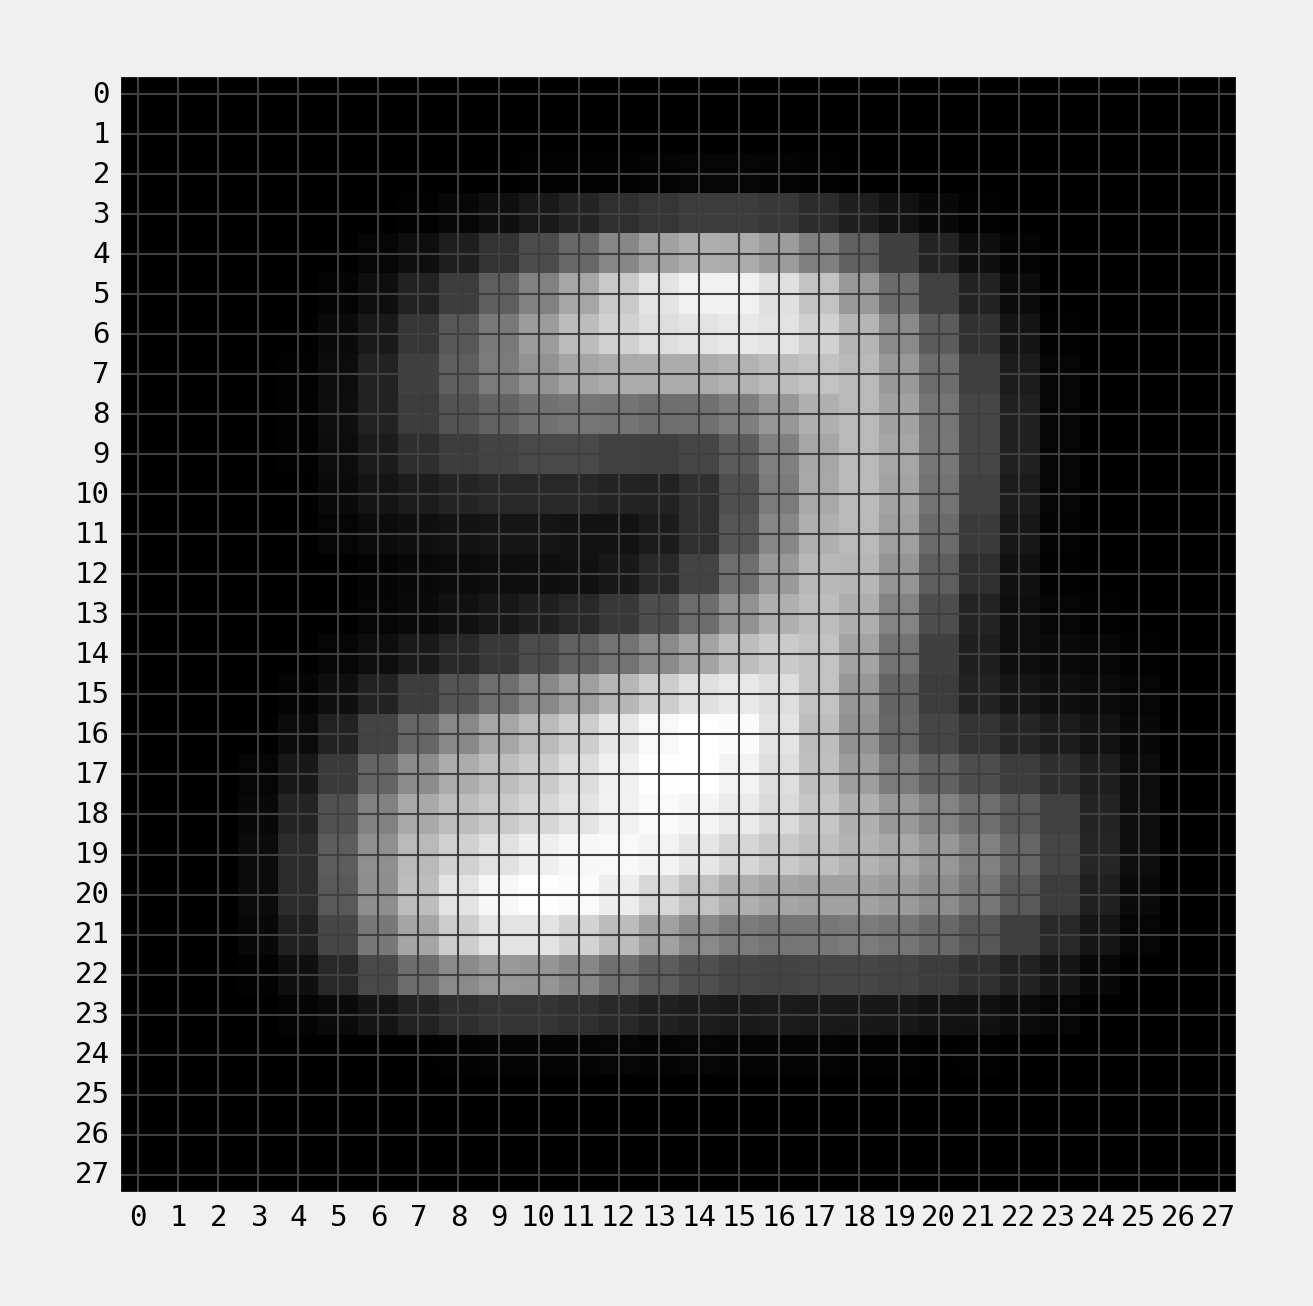

In [25]:
plotDigit(df2Avg[1:785], df2Avg[0])
plt.savefig("../presentations/strata-us/figures/fig_mnist_00d.png", facecolor = "white")

In [26]:
# Plot a particular MNIST data with abline
def plotDigitLine(arr1D, label):
    #arr1D = df.ix[id, 1:785]
    #label = df.ix[id, 0]
    pixels = np.array(arr1D, dtype='uint8')
    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28, 28))
    # Plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(pixels, cmap='gray')
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.xticks(np.arange(0, 28, 1))
    plt.yticks(np.arange(0, 28, 1))
    #plt.title('Label is {label}'.format(label=label))
    plt.grid(which='major', color=(0.25,0.25,0.25))
    plt.axvline(13.5, color='r', lw = 2)
    plt.axhline(13.5, color='r', lw = 2)

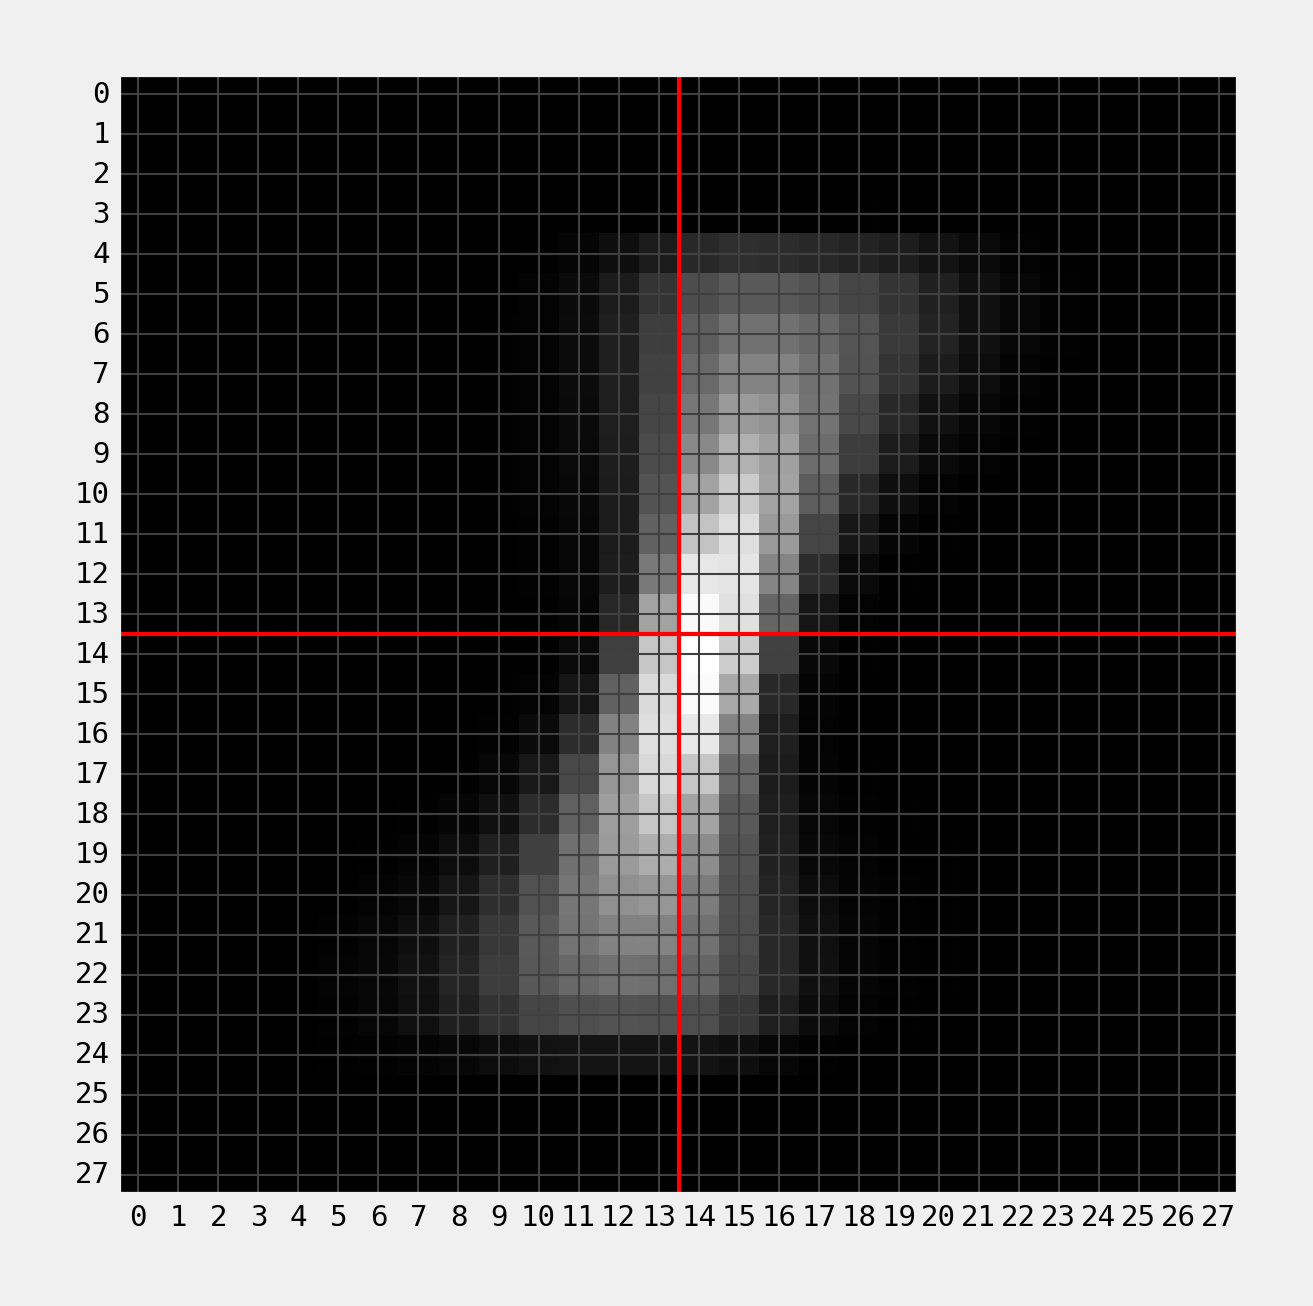

In [27]:
plotDigitLine(df1Avg[1:785], df1Avg[0])
plt.savefig("../presentations/strata-us/figures/fig_mnist_00e.png", facecolor = "white")

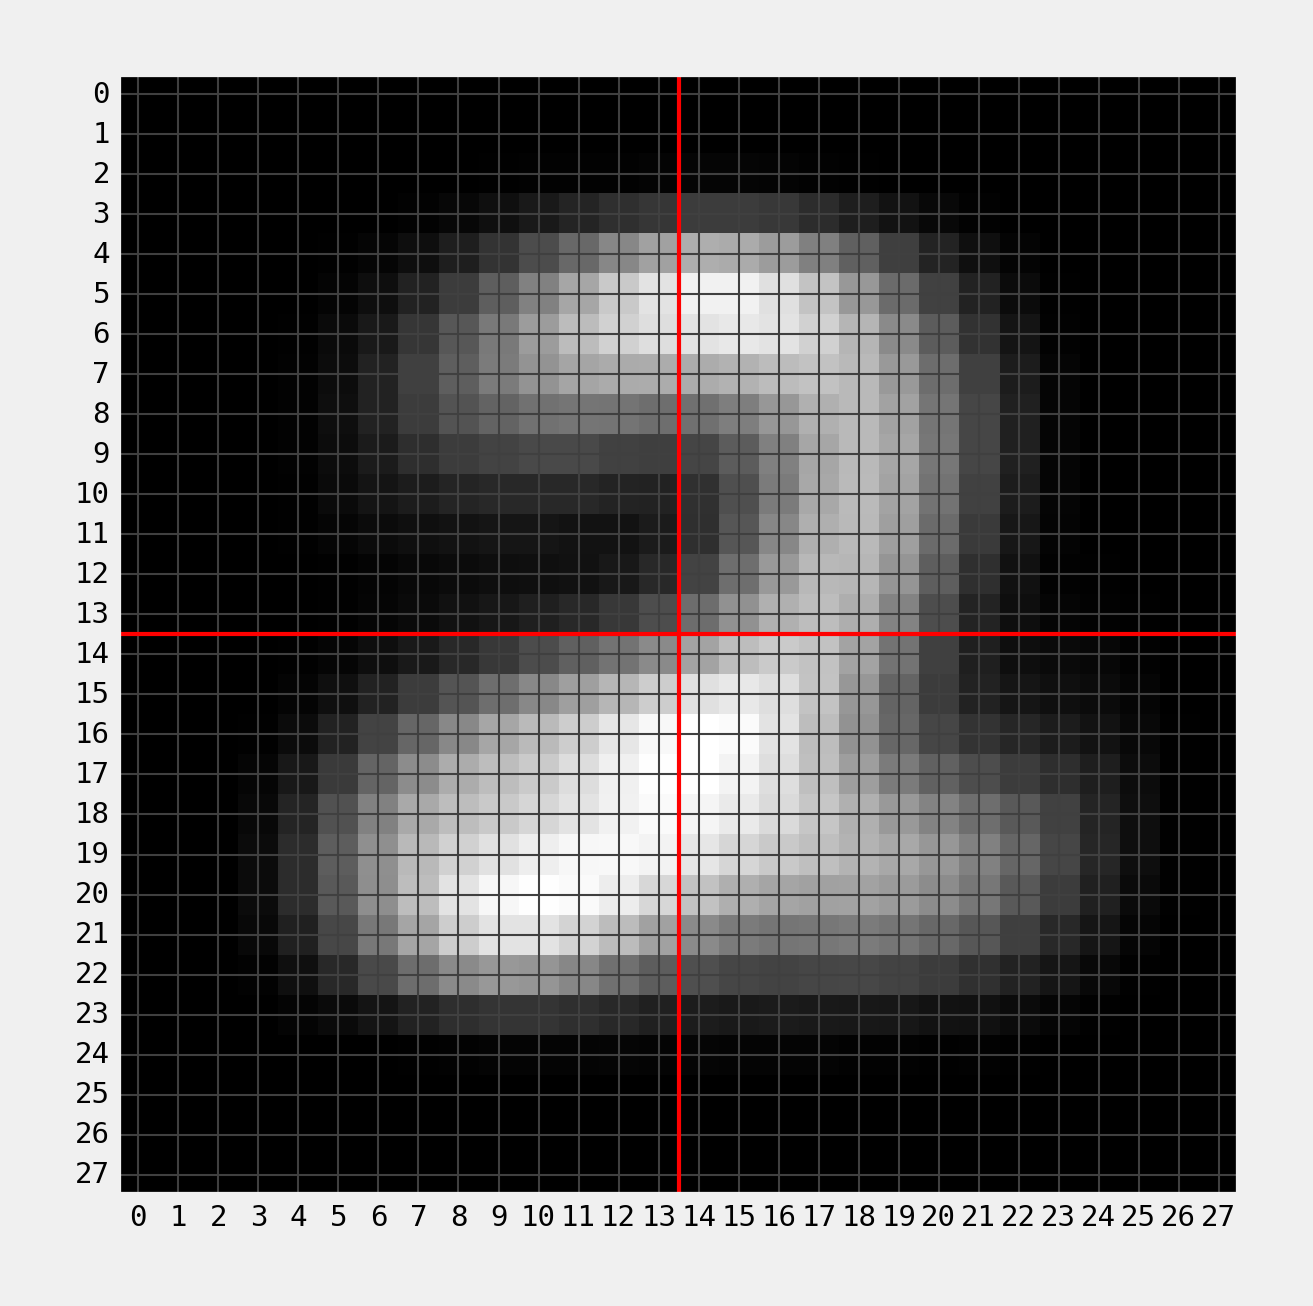

In [28]:
plotDigitLine(df2Avg[1:785], df2Avg[0])
plt.savefig("../presentations/strata-us/figures/fig_mnist_00f.png", facecolor = "white")

In [29]:
def plotSymmetry(arr1D, label):
    pixels = np.array(arr1D, dtype='uint8')
    pixels = pixels.reshape((28, 28))
    plotDigit(pixels, label)
    plt.show()
    pixelslr = np.fliplr(pixels)
    plotDigit(pixelslr, label)
    plt.show()
    plotDigit(np.abs(pixelslr - pixels), label)
    plt.show()
    pixelsud = np.flipud(pixels)
    plotDigit(pixelsud, label)
    plt.show()
    plotDigit(np.abs(pixelsud - pixels), label)
    plt.show()

## [0] Visualise the entire feature space

In [30]:
df12 = df[(df.num == 1) | (df.num == 2)].copy()
df12.head()

,num,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x777,x778,x779,x780,x781,x782,x783,x784,intensity,symmetry
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.164601,0.090276
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.075895,0.059544
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.089421,0.056343
22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.055102,0.043537
23,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.133839,0.094758


In [31]:
df12.shape

(5234, 787)

In [32]:
# Font Settings
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['axes.labelpad'] = 5

In [33]:
color1 = (0.267004, 0.004874, 0.329415)
color2 = (0.657642, 0.860219, 0.203082)
datacolor = (0, 0, 0.75, 0.5)
predcolor = (0.75, 0, 0, 0.7)
colors = {1: color1, 2: color2}

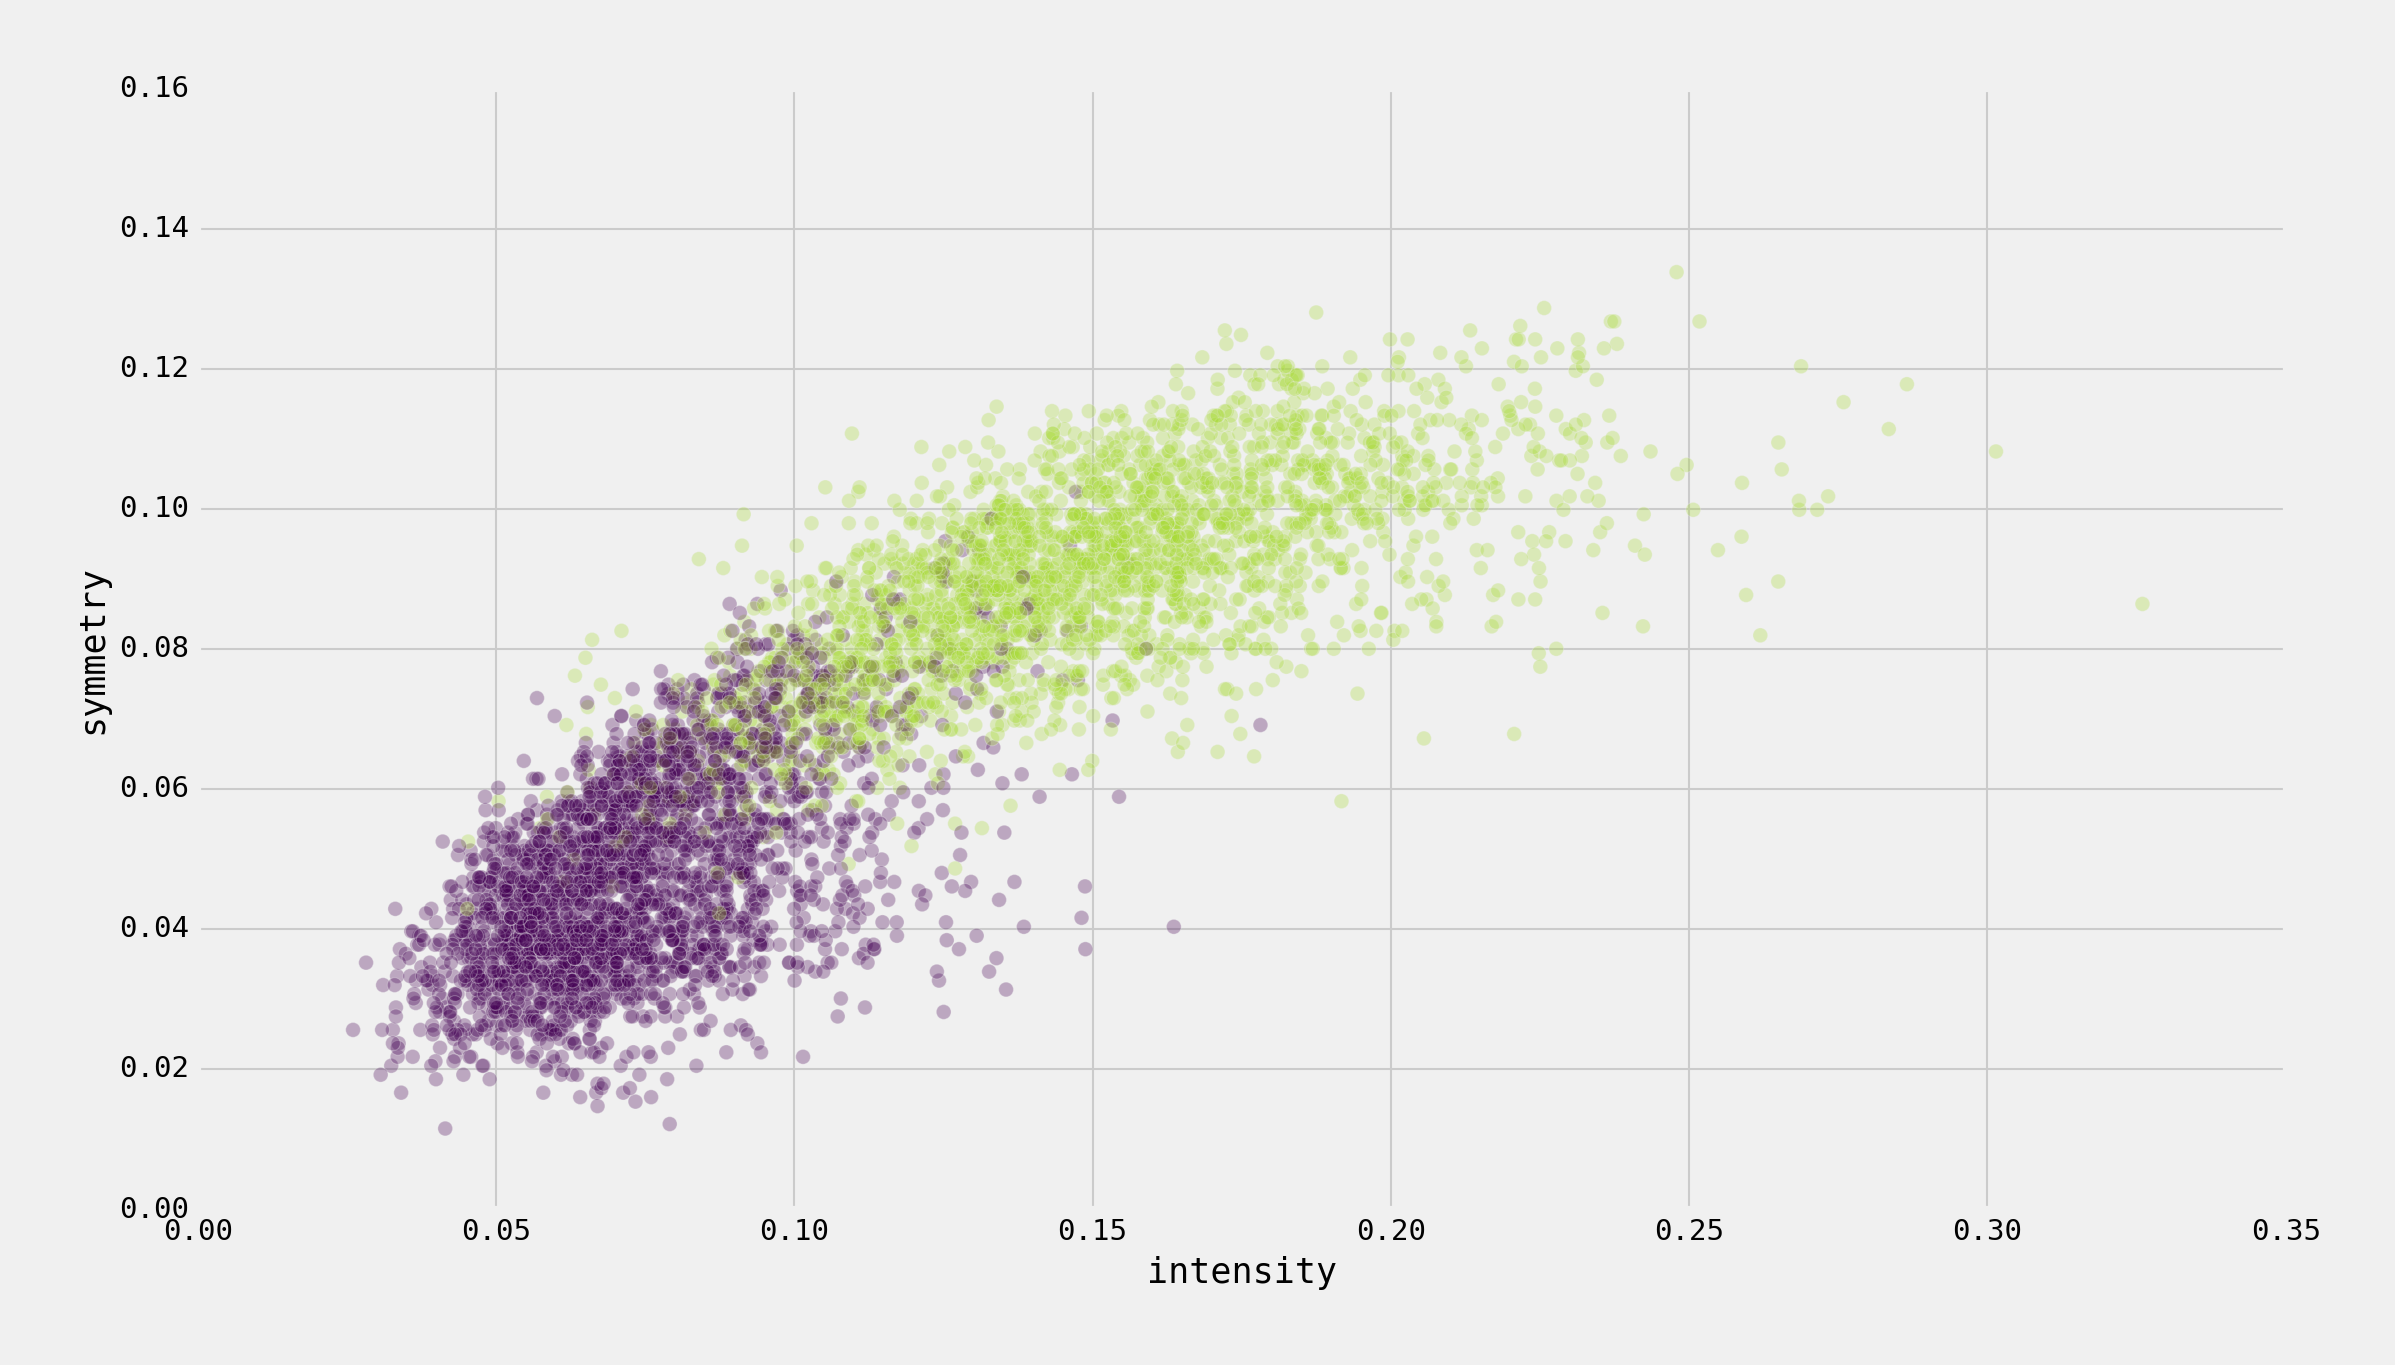

In [34]:
plt.scatter(df12.intensity, df12.symmetry, c = df12['num'].apply(lambda x: colors[x]), alpha = 0.3, s = 50)
plt.xlabel('intensity')
plt.ylabel('symmetry')
plt.savefig("../presentations/strata-us/figures/fig_mnist_06.png")

In [35]:
# df12.plot(kind = 'scatter', x = 'intensity', y = 'symmetry', c = df12['num'].apply(lambda x: colors[x]), 
#          alpha = 0.3, s = 50, cmap = plt.cm.viridis)

## [1] Visualise the Prediction 

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn import svm

In [37]:
df12.shape

(5234, 787)

In [38]:
df12Y = df12.ix[:,0]

In [39]:
df12X = df12.ix[:,785:787]

In [40]:
modelLR = LogisticRegression()

In [41]:
modelLR.fit(df12X, df12Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
df12.loc[:, 'LRpred'] = modelLR.predict(df12X)

In [43]:
modelLR.predict_proba(df12X)[:,0]

array([ 0.15417255,  0.73993239,  0.68265396, ...,  0.91403756,
        0.49062545,  0.11741364])

In [44]:
df12.loc[:, 'LRpred_prob'] = modelLR.predict_proba(df12X)[:,0]

In [45]:
df12.head()

,num,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x779,x780,x781,x782,x783,x784,intensity,symmetry,LRpred,LRpred_prob
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.164601,0.090276,2,0.154173
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.075895,0.059544,1,0.739932
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.089421,0.056343,1,0.682654
22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.055102,0.043537,1,0.863571
23,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.133839,0.094758,2,0.265649


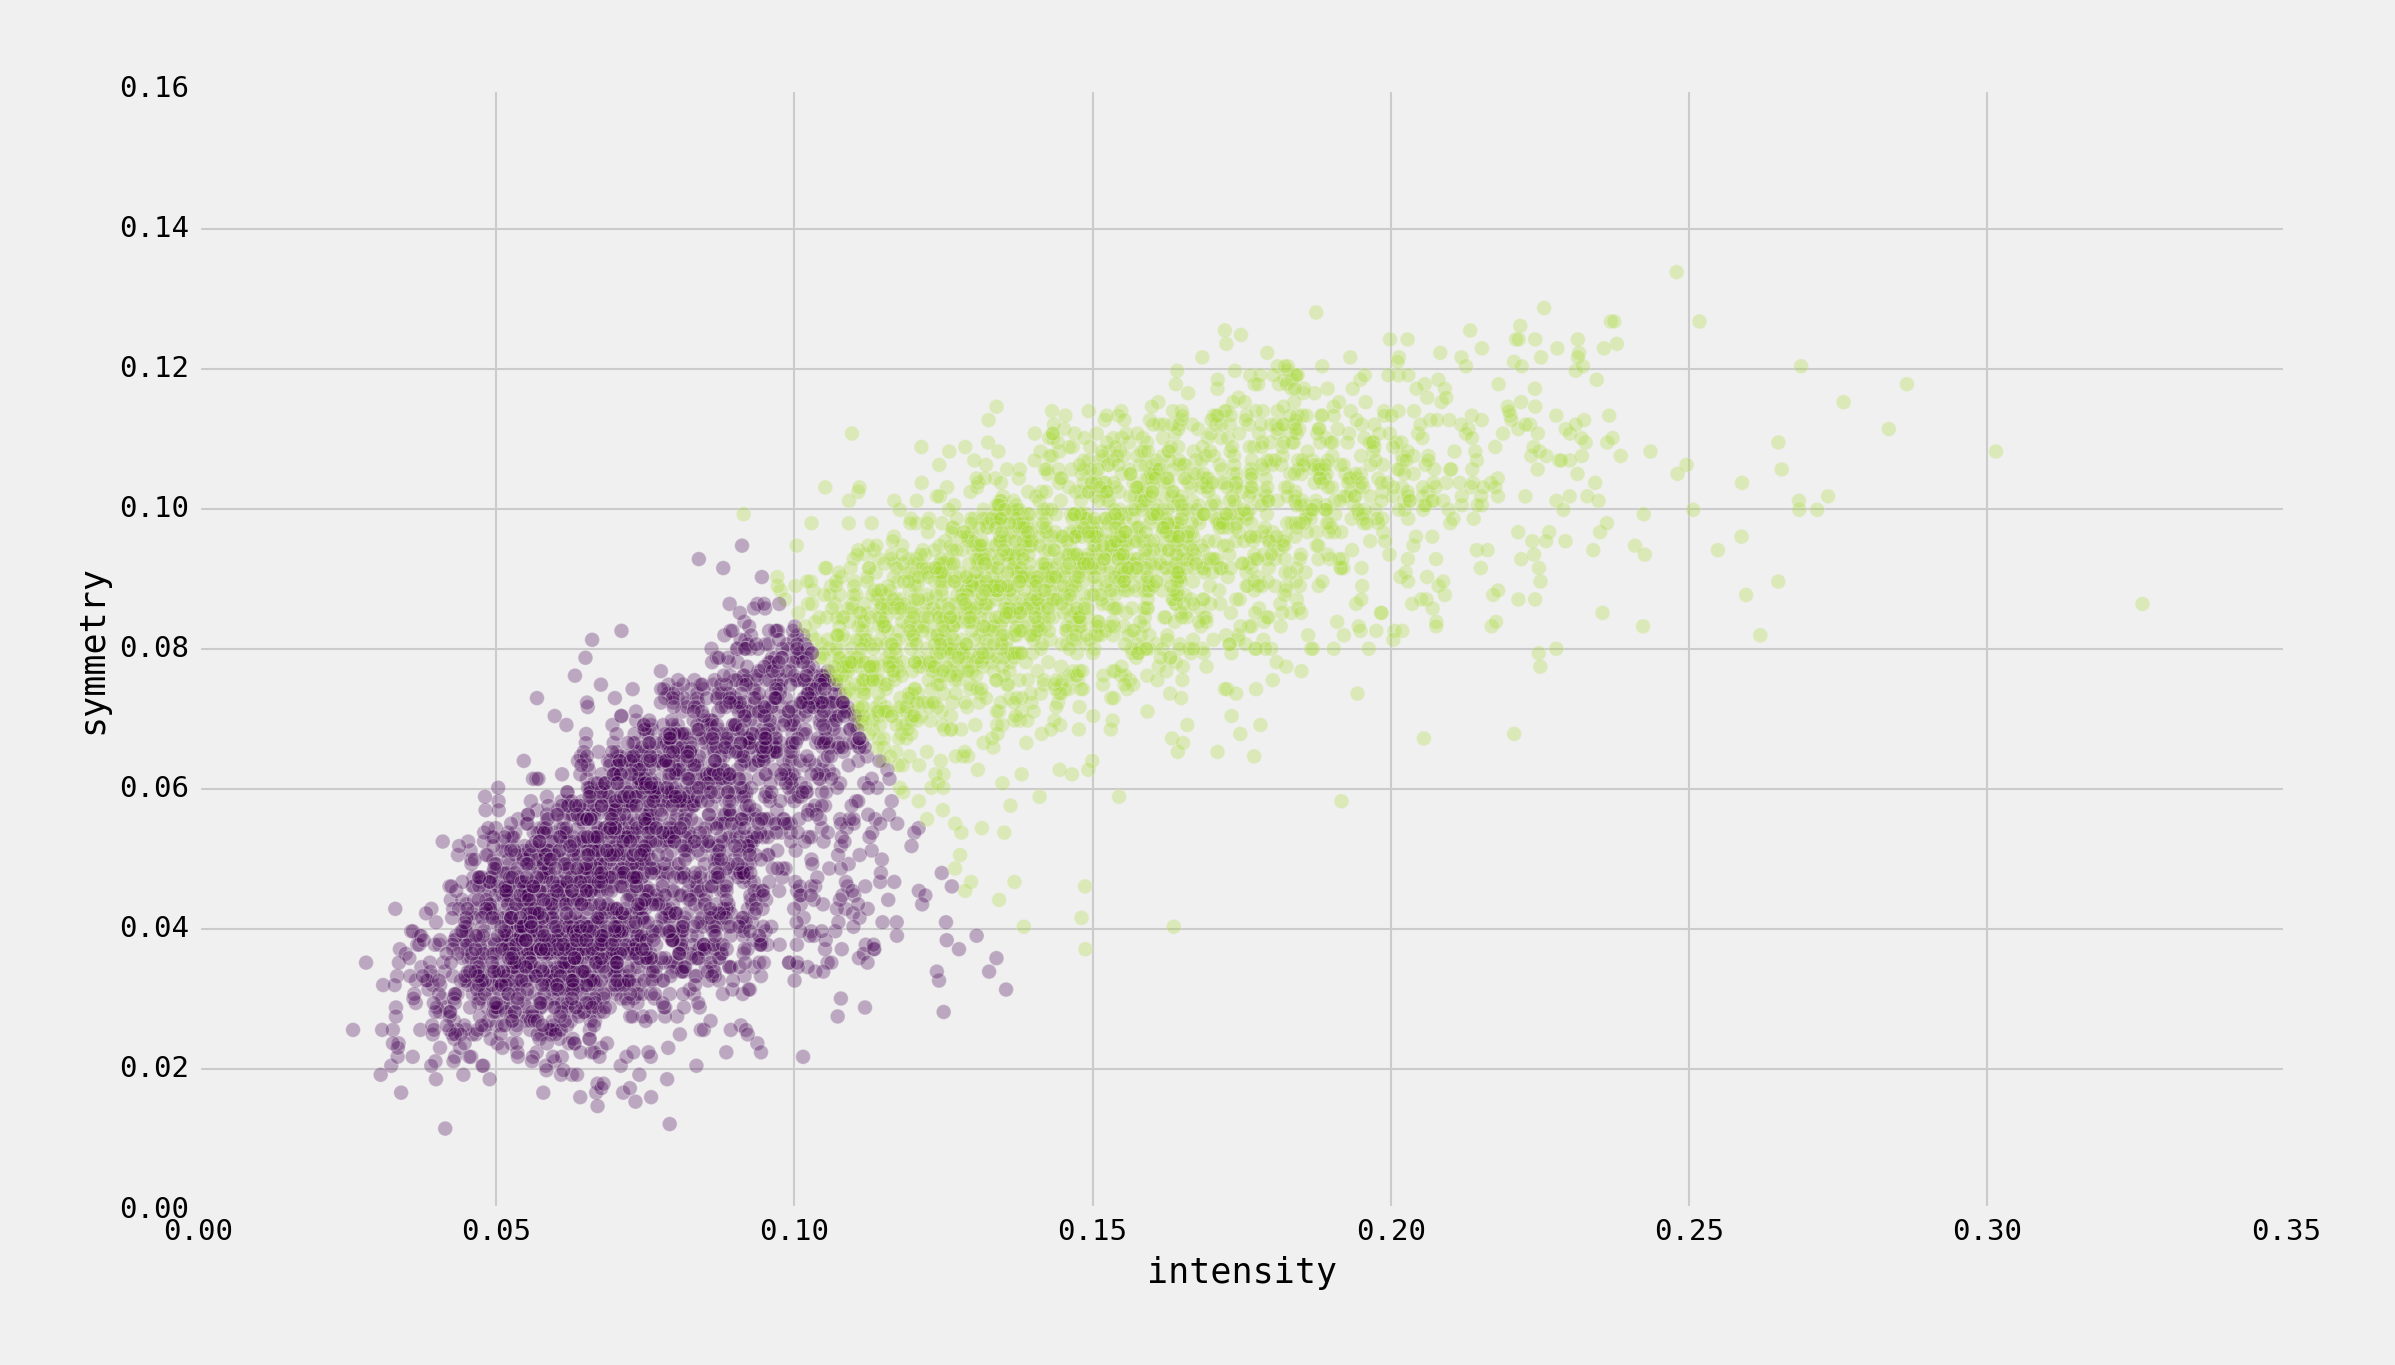

In [46]:
#df12.plot(kind = 'scatter', x = 'intensity', y = 'symmetry', c = df12.LRpred, 
#          alpha = 0.3, s = 50, cmap = plt.cm.viridis)

plt.scatter(df12.intensity, df12.symmetry, c = df12['LRpred'].apply(lambda x: colors[x]), alpha = 0.3, s = 50)
plt.xlabel('intensity')
plt.ylabel('symmetry')
plt.savefig("../presentations/strata-us/figures/fig_mnist_01.png")

## [2] Visualise the errors in model fitting

In [47]:
df12['LR_error'] = np.abs(df12['num']- df12['LRpred'])

In [48]:
df12.head()

,num,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x780,x781,x782,x783,x784,intensity,symmetry,LRpred,LRpred_prob,LR_error
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.164601,0.090276,2,0.154173,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.075895,0.059544,1,0.739932,0
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.089421,0.056343,1,0.682654,0
22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.055102,0.043537,1,0.863571,0
23,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.133839,0.094758,2,0.265649,0


In [49]:
df12error = df12[df12.LR_error == 1]

In [50]:
df12error.head()

,num,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x780,x781,x782,x783,x784,intensity,symmetry,LRpred,LRpred_prob,LR_error
122,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.106988,0.074910,1,0.500321,1
151,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.131728,0.066587,2,0.385425,1
191,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.148054,0.083233,2,0.237484,1
200,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.091542,0.071068,1,0.611373,1
225,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.134889,0.060824,2,0.390944,1


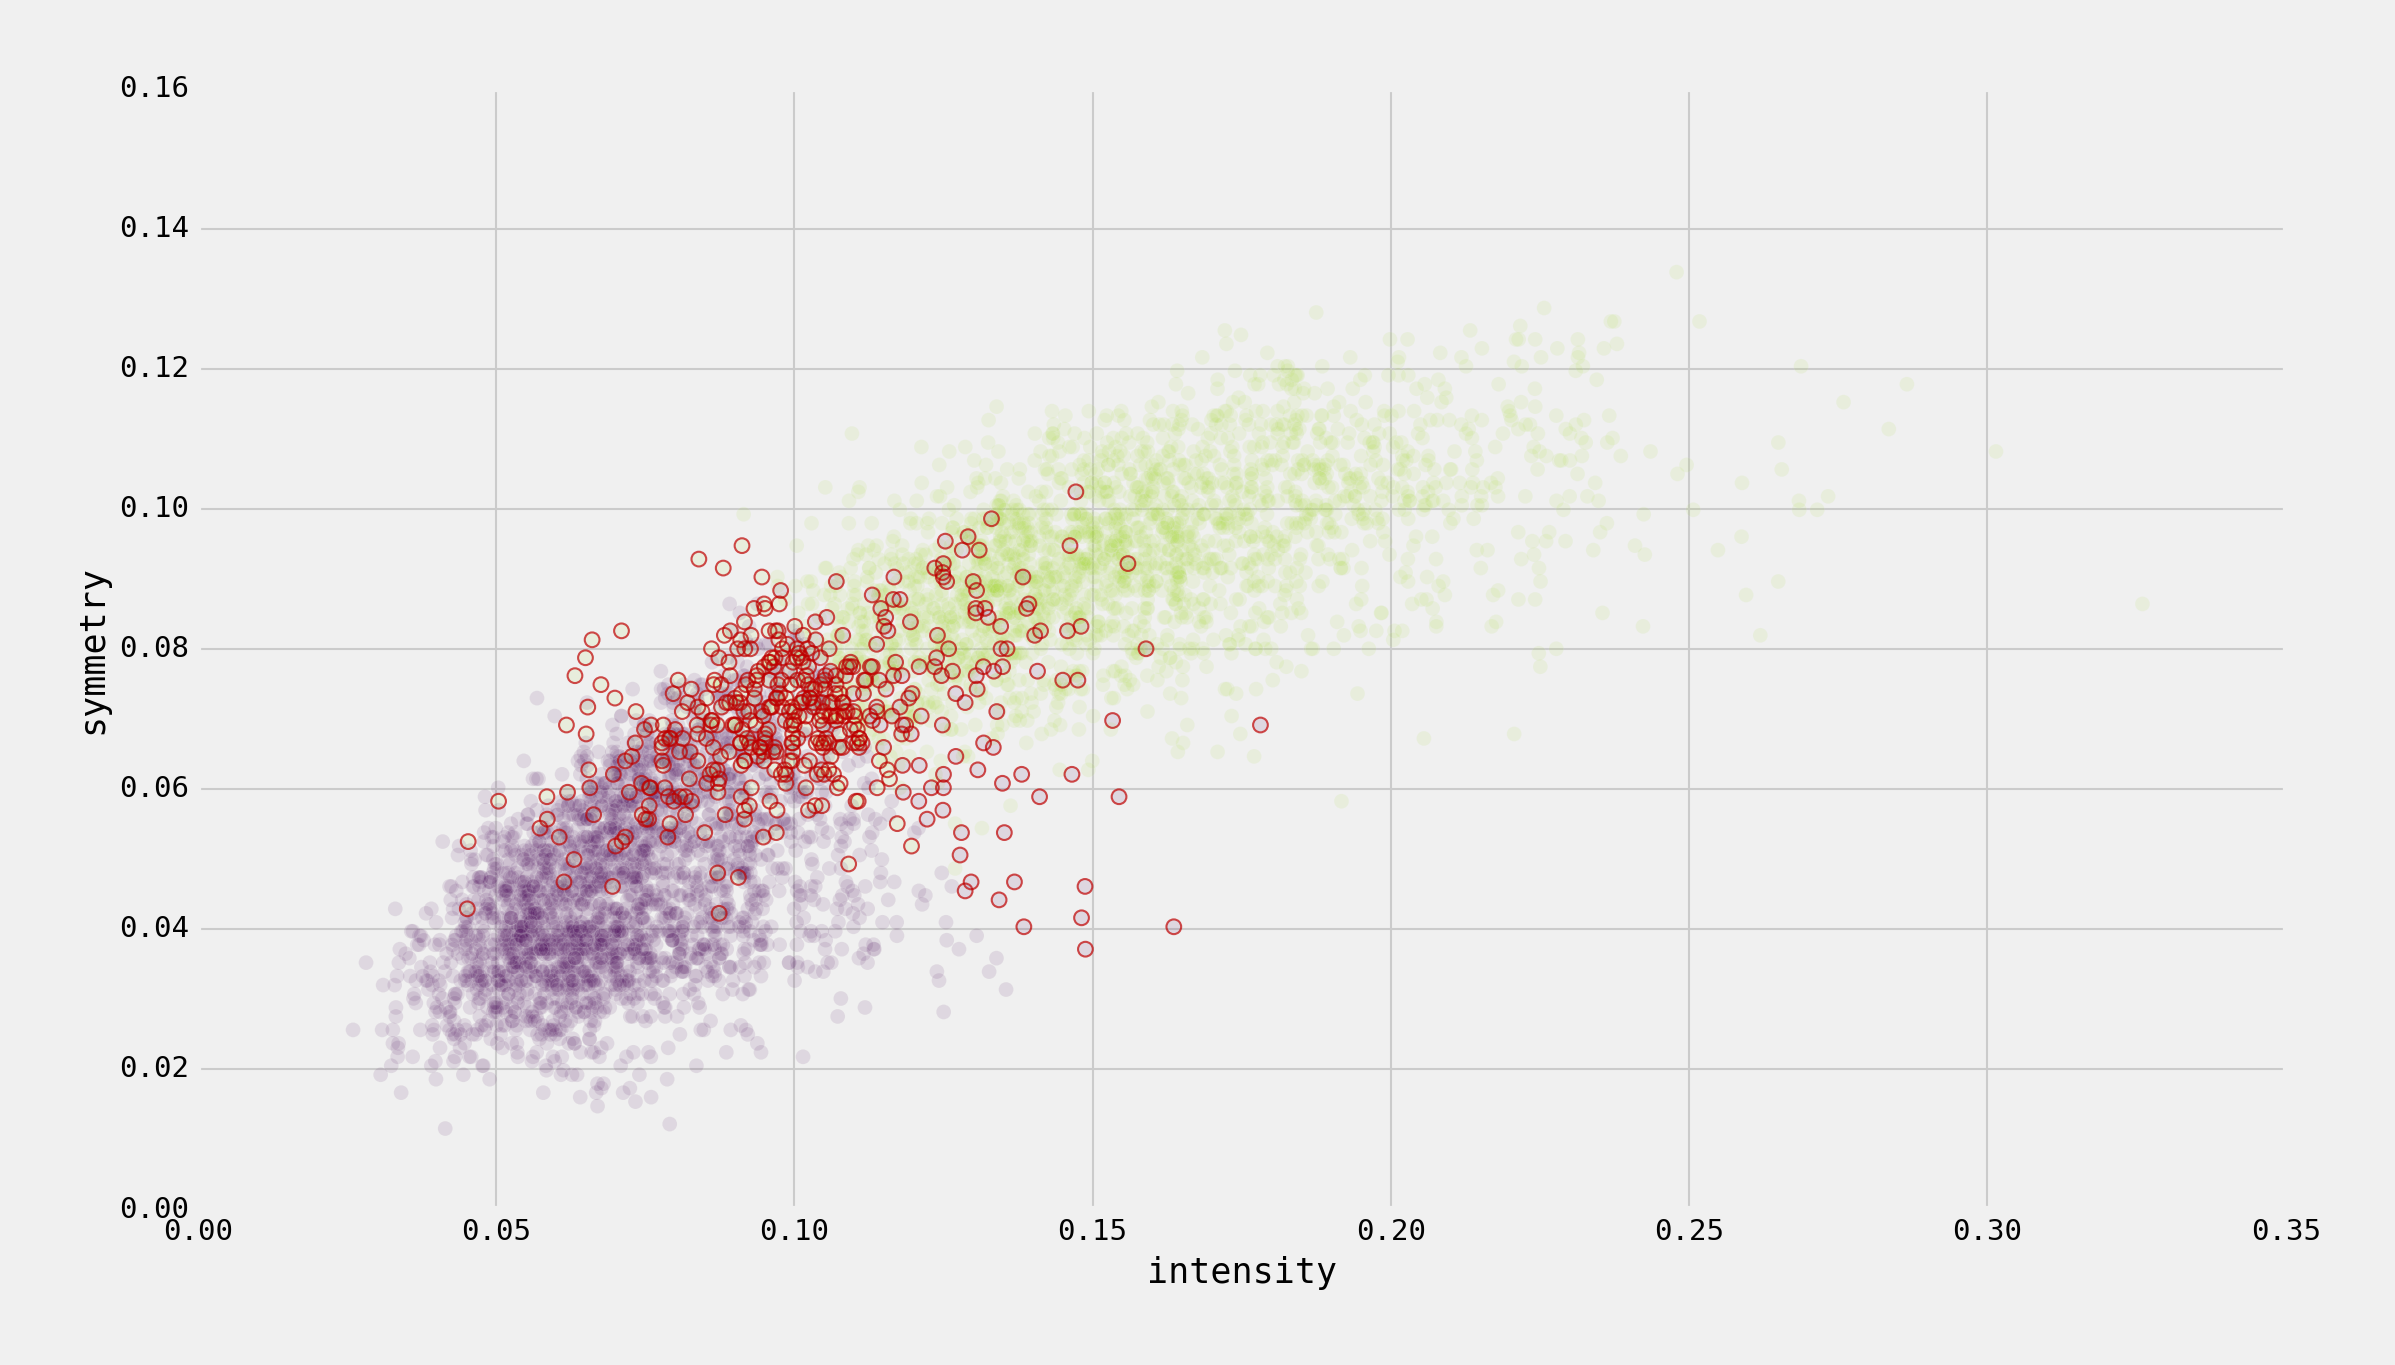

In [51]:
plt.scatter(df12.intensity, df12.symmetry, c = df12['num'].apply(lambda x: colors[x]), alpha = 0.1, s = 50)
plt.scatter(df12error.intensity, df12error.symmetry, facecolor="None", edgecolor=predcolor, linewidth=1, s = 50)
plt.xlabel('intensity')
plt.ylabel('symmetry')
plt.savefig("../presentations/strata-us/figures/fig_mnist_02.png")

In [52]:
from sklearn.manifold import TSNE

In [53]:
df.head()

,num,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x777,x778,x779,x780,x781,x782,x783,x784,intensity,symmetry
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.108398,0.075550
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.164601,0.090276
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.151251,0.085154
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.135649,0.081953
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.086405,0.079392
